# Unsupervised Learning with kMeans

Unlike the MLP and random forest classifier used before, the kMeans clustering algorithm does not need labeled data. 

## Loading and preparing the data

We load the dataframe as usual, but we will use input features (var3 and var4) only. You can try other pairings of course. Also, we will not normalize the input features, as they all have the same value ranges already.

In [6]:
import pandas as pd
from joblib import load

print(" ")
print("Load dataframe and prepare data...")

data_directory = 'http://hadron.physics.fsu.edu/~dlersch/GlueX_PANDA_EIC_ML_Workshop'
data_name = 'hands_on_data_033_033_033.csv' #---> Change this name to analyze imbalanced data
dataFrame = pd.read_csv(data_directory + '/' + data_name)

used_features = ['var3','var4'] #--> Change the elements here, in order to use different features
X = dataFrame[used_features].values

print("...done!")
print("  ")


Load dataframe and prepare data...
...done!
  


## Setting up the kMeans-Algorithm and fitting the Data

scikit offers different clustering algorithms, but we will stick here to the kMeans clustering algorithm. However, you are welcome to explore other options.

In [7]:
from sklearn.cluster import KMeans

print("Setup algorithm and fit data...")

kmeans = KMeans(n_clusters = 3,random_state=42)
kmeans.fit(X)

print("...done!")
print("  ")

Setup algorithm and fit data...
...done!
  


## Obtaining the Results

After fitting the data, we want to check the cluster centers (found by the alfgorithm) and calculate the distance between each point in our data and the corresponding cluster center.

In [8]:
kmeans.cluster_centers_

array([[0.02006308, 0.00525589],
       [0.00403661, 0.00424066],
       [0.0146636 , 0.01820708]])

Determine distance to clusters and add the to the dataframe...
...done!
  
Plot the distances...


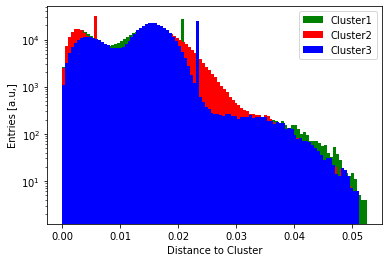

...done!
  


In [9]:
import matplotlib.pyplot as plt

print("Determine distance to clusters and add the to the dataframe...")

distance_to_clu = kmeans.transform(X)

dataFrame['dist_to_clu1'] = distance_to_clu[:,0]
dataFrame['dist_to_clu2'] = distance_to_clu[:,1]
dataFrame['dist_to_clu3'] = distance_to_clu[:,2]

print("...done!")
print("  ")

print("Plot the distances...")

plt.hist(distance_to_clu[:,0],bins=100,facecolor='g',alpha=0.5,log=True,label='Cluster1')
plt.hist(distance_to_clu[:,1],bins=100,facecolor='r',alpha=0.5,log=True,label='Cluster2')
plt.hist(distance_to_clu[:,2],bins=100,facecolor='b',alpha=0.5,log=True,label='Cluster3')
plt.xlabel('Distance to Cluster')
plt.ylabel('Entries [a.u,]')
plt.legend()
plt.show()

print("...done!")
print("  ")
